# Depositional Mechanics Homework Nicole Hucke 

In [2]:
# Import Packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

1. Plot the vector field $q=(U,V)$ in the domain from $-1<x<1$ and $-1<y<1$ given by
     $$U=-X$$
     $$V=-Y$$

In [21]:
# Define our domain
xrange=np.arange(-1,1.1,0.1) #These vectors will include number 1 in the array because my limit was 1.2
yrange=np.arange(-1,1.1,0.1)

X,Y=np.meshgrid(xrange,yrange)

In [22]:
# Define functions of the vector at every (x,y) location
def Ucomp(xmatrix,ymatrix):
    return -xmatrix

def Vcomp(xmatrix,ymatrix):
    return -ymatrix

#assign them
U=Ucomp(X,Y)
V=Vcomp(X,Y)

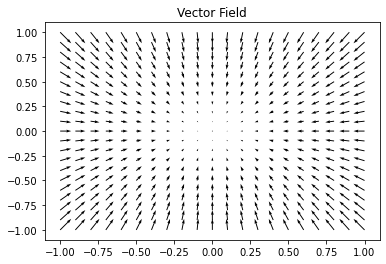

In [23]:
# Plot using quiver
axis=plt.quiver(X,Y,U,V)
plt.title("Vector Field")
plt.show()

2. Use the `ExnerCalculator` function to display an erosional/deposition heatmap for the change in elevation $\Delta \eta$

In [24]:
# Define ExnerCalculator function

#Exner function
def ExnerCalculator(X,Y,Uq,Vq,eps=1,dt=0.1):
    """
    ExnerCalculator takes in the X and Y locations and the vector field defined by U and V and returns the
    deposition/erosion happening at the current time.
    
    Parameters
    ----------
    X: matrix 
        x locations of the flux
    Y: matrix 
        y locations of the flux
    Uq: matrix 
        first components of the flux
    Vq: matrix 
        second components of the flux
    eps: float
        1-porosity of the bed
    dt: float
        time delta for the method

    Returns
    -------
    Xs: matrix 
        x locations with n-1 locations corresponding to dh
    Ys: matrix 
        y locations with n-1 locations corresponding to dh
    dh: matrix
        The difference in elevation in dt time units based on the flux
    """
    m,n=X.shape
    dx=X[0][1]-X[0][0]
    dy=Y[1][0]-Y[0][0]

    #gradient
    dUq=[ [Uq[j][i+1]-Uq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    dVq=[ [Vq[j+1][i]-Vq[j][i] for i in range(n-1) ] for j in range(m-1) ]
    
    #exner
    dh=(-dt/eps)*(dUq/dx+dVq/dy)

    #new Xs and Ys
    Xs=np.array([ [X[j][i] for i in range(n-1) ] for j in range(m-1) ])
    Ys=np.array([ [Y[j][i] for i in range(n-1) ] for j in range(m-1) ])

    return Xs,Ys,dh

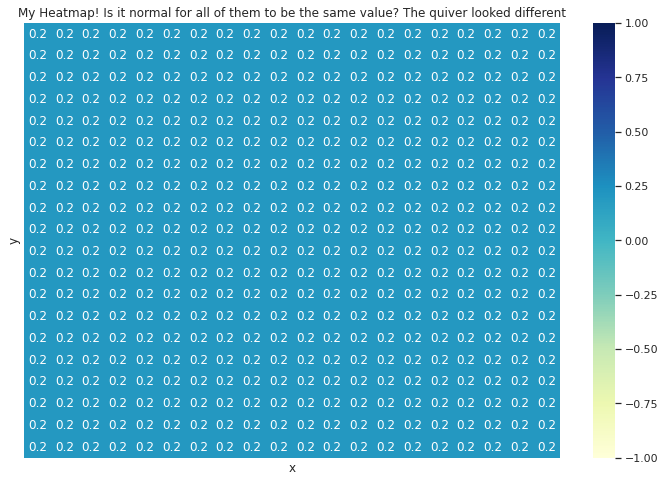

In [53]:
#use the function on the flux
newx,newy,deltah=ExnerCalculator(X,Y,U,V)

#plot the heatmap
erosion=pd.DataFrame( {"x": newx.flatten() ,"y":newy.flatten(),"erosion": deltah.flatten()} )
erosion_table=erosion.pivot_table(columns="x",index="y",values="erosion")

plt.figure(figsize = (12,8))
sns.heatmap(erosion_table, vmin=-1, vmax=1, cmap="YlGnBu", annot=True, yticklabels=False, xticklabels=False)
plt.title("My Heatmap! Is it normal for all of them to be the same value? The quiver looked different")
plt.show()

3. Given the data of the three variables $weight, height$ and $age$ below, find the correlation matrix between them and make a heatmap of the correlation matrix.

In [47]:
# Creating our dataframe with the data 
d = {
    'weight': [162.22, 156.12, 169.31, 179.76, 173.12, 165.66, 166.61, 170.91, 156.67, 170.94], 
    'height': [7.8954, 7.7507, 7.7312, 7.9815, 7.8738, 7.6802, 7.7422, 7.8297, 7.8992, 7.9033],
    'age' : [32, 33, 22, 45, 33, 49, 36, 20, 41, 25]
    }
df = pd.DataFrame(data=d)

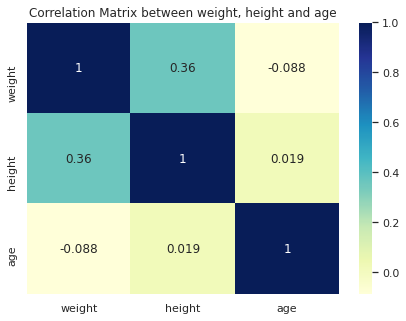

In [58]:
corr_matrix=df.corr()
plt.figure(figsize = (7,5))
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)
plt.title("Correlation Matrix between weight, height and age")
plt.show()